## Term Deposit Marketing Analysis

### 1. Importing libraries and dataset

#### 1.1. Importing required libraries

In [147]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### 1.2. Importing dataset to notebook

In [81]:
df=pd.read_csv(r'term-deposit-marketing-2020.csv')

In [82]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no


### 2. Preprocessing the data

#### 2.1. Checking for null values

In [83]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

No null value in dataset. So, we can continue with transformation.

#### 2.2. Variable transformation

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


As we can see, there are categorical variables in the dataset. In order to establish a model, i will transform the variables from categorical to numeric with LabelEncoder.

In [86]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df.job = lbe.fit_transform(df.job)
df.marital = lbe.fit_transform(df.marital)
df.education = lbe.fit_transform(df.education)
df.default = lbe.fit_transform(df.default)
df.housing = lbe.fit_transform(df.housing)
df.loan = lbe.fit_transform(df.loan)
df.contact = lbe.fit_transform(df.contact)
df.month = lbe.fit_transform(df.month)
df.y=lbe.fit_transform(df.y)

In [87]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0


### 3. Establishing the model for prediction

#### 3.1. Splitting into train and test data

In [103]:
y = df['y']
X = df.drop('y',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

I will automate the process to see which model is the best option for our data.

#### 3.2. Prediction

In [143]:
results = []
names = []
models=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,RandomForestClassifier,AdaBoostClassifier,LGBMClassifier]
def compML(df,algorithm):
    model=algorithm().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    model_name=algorithm.__name__
    results.append(accuracy)
    names.append(model_name)
    print(model_name,"-> The accuracy of the model:",accuracy)
for i in models:
    compML(df,i)

LogisticRegression -> The accuracy of the model: 0.934125
DecisionTreeClassifier -> The accuracy of the model: 0.919375
KNeighborsClassifier -> The accuracy of the model: 0.9295
SVC -> The accuracy of the model: 0.929125
RandomForestClassifier -> The accuracy of the model: 0.937875
AdaBoostClassifier -> The accuracy of the model: 0.933375
LGBMClassifier -> The accuracy of the model: 0.93925


#### 3.3. Comparison of the models

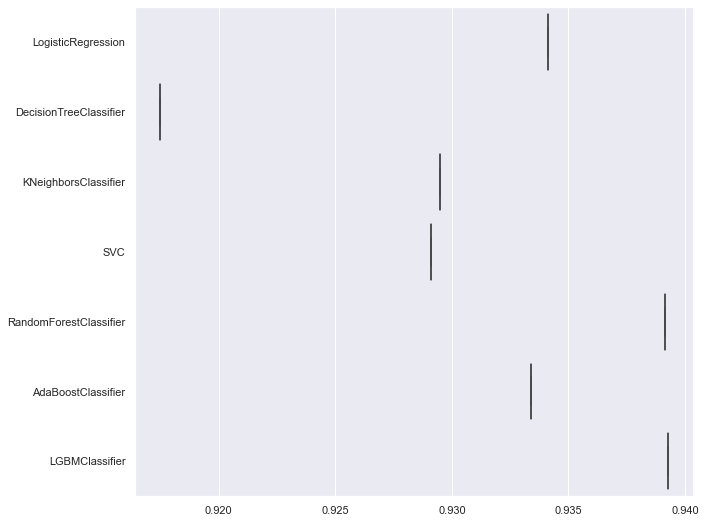

In [130]:
sns.set(rc={'figure.figsize':(10,9)})
sns.boxplot(results,names);

LGBMClassifier ve Random Forest algorithms are the best options for our dataset. 

#### 3.4 Model Tuning

Accuracy rates were obtained without any changes in parameters. In this section we will try to optimize accuracy rates using model tuning methods.

##### 3.4.1. LGBMClassifier Model Tuning

In [155]:
lgbmc_params={'n_estimators':[100,500],
              'subsample':[0.6,0.8,1.0],
              'max_depth':[3,4,5],
              'learning_rate':[0.1,0.01,0.05],
              'min_child_samples':[5,10,20]}

In [156]:
lgbmc=LGBMClassifier()
lgbmc_cv_model=GridSearchCV(lgbmc,lgbmc_params,cv=5,n_jobs=-1,verbose=10)

In [157]:
lgbmc_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=10)

In [158]:
#Best params can be obtained from following code
lgbmc_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 10,
 'n_estimators': 500,
 'subsample': 0.6}

In [160]:
lgbmc_tuned=LGBMClassifier(learning_rate= 0.05, max_depth= 3, min_child_samples= 10, n_estimators= 500, subsample= 0.6)

In [163]:
lgbmc_tuned=lgbmc.fit(X_train,y_train)
y_pred=lgbmc_tuned.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy :  0.9445
Confusion Matrix : 
 [[7333  104]
 [ 340  223]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7437
           1       0.68      0.40      0.50       563

    accuracy                           0.94      8000
   macro avg       0.82      0.69      0.74      8000
weighted avg       0.94      0.94      0.94      8000



Initially, the accuracy rate was 0.939. Now the rate is 0.944.

##### 3.4.2. Random Forest Model Tuning

In [164]:
rf_params={'n_estimators':[10,500,1000],
           'max_depth':[2,5,8],
           'max_features':[2,5,8],
           'min_samples_split':[2,5,10]}

In [165]:
rf=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf,rf_params,cv=5,n_jobs=-1,verbose=10)

In [166]:
rf_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 13

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=10)

In [167]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

In [168]:
rf_tuned=LGBMClassifier(n_estimators=500 , max_depth=8, max_features=5 , min_samples_split=5)

In [169]:
rf_tuned=rf.fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy :  0.9385
Confusion Matrix : 
 [[7312  125]
 [ 367  196]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      7437
           1       0.61      0.35      0.44       563

    accuracy                           0.94      8000
   macro avg       0.78      0.67      0.71      8000
weighted avg       0.93      0.94      0.93      8000



Random forest algorithm might be a good option for our dataset, but this model takes more time compared to LGBM. 

#### 3.5. Best features 

##### 3.5.1. LGBMClassifier Best Features

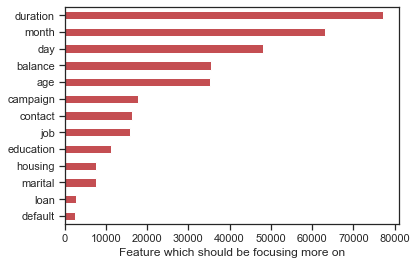

In [183]:
Importance=pd.DataFrame({'Importance':lgbmc_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by='Importance', 
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r')
plt.xlabel('Feature which should be focusing more on')
plt.gca().legend_=None

According to LGBMClassifier algorithm, 'last contact duration', 'last contact month of year' and 'last contact day of the month'  features are important.

##### 3.5.1. Random Forests Best Features

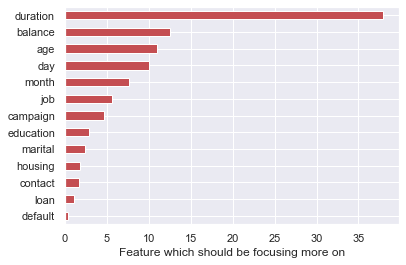

In [170]:
Importance=pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by='Importance', 
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r')
plt.xlabel('Feature which should be focusing more on')
plt.gca().legend_=None

According to Random Forests algorithm, 'last contact duration', 'average yearly balance', 'age' and  'last contact day of the month' features are important.

### 4. Data visualization for customer segmentation

In [180]:
df_initial=pd.read_csv(r'term-deposit-marketing-2020.csv')
df_initial.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no


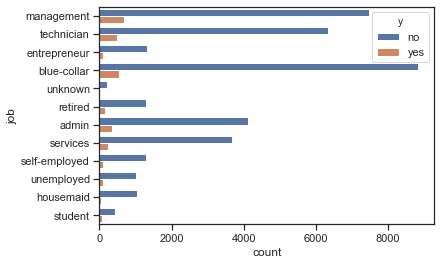

In [199]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job',hue='y', data=df_initial);

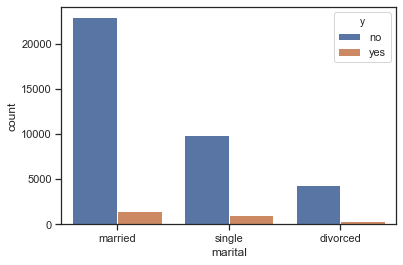

In [203]:
sns.countplot(x='marital',hue='y', data=df_initial);

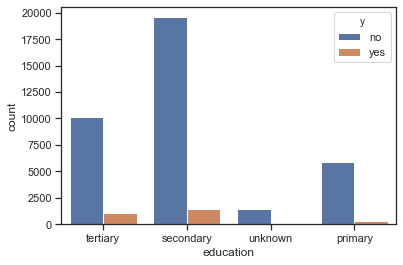

In [202]:
sns.countplot(x='education', hue='y',data=df_initial);

In [241]:
df_initial.age.value_counts().head(10)

32    1909
31    1826
33    1770
34    1730
35    1721
36    1648
30    1565
37    1538
39    1380
38    1350
Name: age, dtype: int64